In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

**Loading The Data**

In [3]:
train_dir = r'D:\Downloads\Data_set__Presentation_and_Python_Notebook_for_Image_Recognition_Project_Module (2)\Data set, Presentation and Python Notebook for Image recognition project module\cats_and_dogs\train'
validation_dir = r'D:\Downloads\Data_set__Presentation_and_Python_Notebook_for_Image_Recognition_Project_Module (2)\Data set, Presentation and Python Notebook for Image recognition project module\cats_and_dogs\validation'
test_dir = r'D:\Downloads\Data_set__Presentation_and_Python_Notebook_for_Image_Recognition_Project_Module (2)\Data set, Presentation and Python Notebook for Image recognition project module\cats_and_dogs\test'

**Data Preprocessing**

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
#Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(

    train_dir,
    target_size = (150,150),
    batch_size = 20 ,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20 ,
    class_mode = 'binary'

)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = "relu",
                        input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation='sigmoid'))

c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),  # Use learning_rate instead of lr
              metrics=['acc'])


In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)


c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 88s 858ms/step - acc: 0.4914 - loss: 0.7171 - val_acc: 0.5000 - val_loss: 0.6869
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20


c:\Users\Lenovo\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 476ms/step - acc: 0.5885 - loss: 0.6747 - val_acc: 0.5550 - val_loss: 0.6670
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 467ms/step - acc: 0.6351 - loss: 0.6375 - val_acc: 0.6350 - val_loss: 0.6312
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 461ms/step - acc: 0.6860 - loss: 0.6012 - val_acc: 0.6760 - val_loss: 0.6074
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 468ms/step - acc: 0.7228 - loss: 0.5591 - val_acc: 0.6880 - val_loss: 0.5975
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 461ms/step - acc: 0.7534 - loss: 0.5179 - val_acc: 0.6780 - val_loss: 0.6018
Epoch 12/20
100/100 ━━━━━━━━━━━━━━━━━━━━

In [11]:
print(history.history)

{'acc': [0.5105000138282776, 0.0, 0.6000000238418579, 0.0, 0.6365000009536743, 0.0, 0.6865000128746033, 0.0, 0.7164999842643738, 0.0, 0.7400000095367432, 0.0, 0.7559999823570251, 0.0, 0.7854999899864197, 0.0, 0.8029999732971191, 0.0, 0.8209999799728394, 0.0], 'loss': [0.6975991129875183, 0.0, 0.6683156490325928, 0.0, 0.6342513561248779, 0.0, 0.5962561964988708, 0.0, 0.5570804476737976, 0.0, 0.5264260172843933, 0.0, 0.4984869658946991, 0.0, 0.46623897552490234, 0.0, 0.4334450960159302, 0.0, 0.40546393394470215, 0.0], 'val_acc': [0.5, 0.5550000071525574, 0.6349999904632568, 0.6759999990463257, 0.6880000233650208, 0.6779999732971191, 0.6890000104904175, 0.7059999704360962, 0.6779999732971191, 0.7009999752044678], 'val_loss': [0.6869292855262756, 0.667041540145874, 0.6311562657356262, 0.6074387431144714, 0.59750896692276, 0.6017770767211914, 0.5930517315864563, 0.5924050211906433, 0.6516674160957336, 0.5796931982040405]}


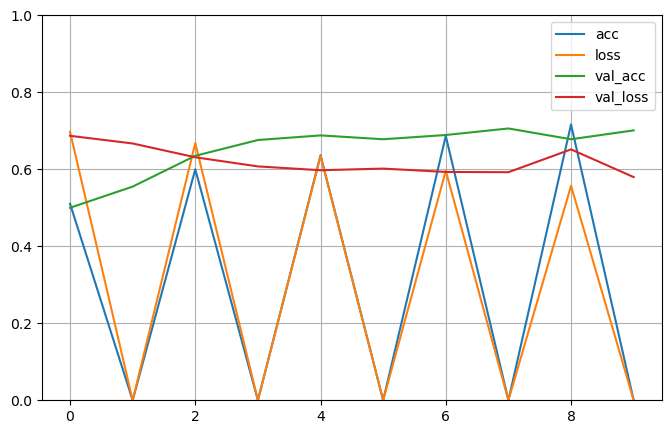

In [12]:
# Find the shortest length among all arrays in history.history
min_length = min(len(v) for v in history.history.values())

# Trim all arrays to the shortest length
trimmed_history = {k: v[:min_length] for k, v in history.history.items()}

# Plot the trimmed history
pd.DataFrame(trimmed_history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # Adjust as per your metric range
plt.show()


In [13]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True ,
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu",
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])


c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)

c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
  7/100 ━━━━━━━━━━━━━━━━━━━━ 52s 565ms/step - acc: 0.5158 - loss: 0.6958

 63/100 ━━━━━━━━━━━━━━━━━━━━ 21s 581ms/step - acc: 0.5259 - loss: 0.6953

c:\Users\Lenovo\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 422ms/step - acc: 0.5250 - loss: 0.6951 - val_acc: 0.5100 - val_loss: 0.6907
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 437ms/step - acc: 0.5173 - loss: 0.6931 - val_acc: 0.5000 - val_loss: 0.6936
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 443ms/step - acc: 0.5090 - loss: 0.6907 - val_acc: 0.6030 - val_loss: 0.6829
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 472ms/step - acc: 0.5364 - loss: 0.6876 - val_acc: 0.5040 - val_loss: 0.6864
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 427ms/step - acc: 0.5725 - loss: 0.6753 - val_acc: 0.5890 - val_loss: 0.6634
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 443ms/step - acc: 0.5776 - loss: 0.6706 - val_acc: 0.5060 - val_loss: 0.7401
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 422ms/step - acc: 0.5799 - loss: 0.6651 - val_acc: 0.5630 - val_loss: 0.6759
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 490ms/step - acc: 0.5904 - loss: 0.6619 - val_acc: 0.6150 - val_loss: 0.6468
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s

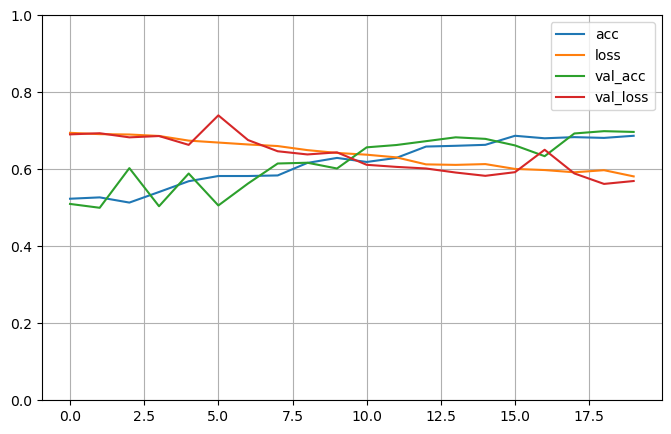

In [16]:
pd.DataFrame(history.history).plot(figsize =(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [17]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True ,
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150,150,3)
)

In [19]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),  # Use learning_rate instead of lr
              metrics=['acc'])

In [23]:
checkpoint_cb= keras.callbacks.ModelCheckpoint("CNN_project_Model-{epoch:02d}.keras")

In [24]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=50,
    callbacks = [checkpoint_cb]
)

c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
 63/100 ━━━━━━━━━━━━━━━━━━━━ 6:56 11s/step - acc: 0.5489 - loss: 0.7207

c:\Users\Lenovo\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 810s 8s/step - acc: 0.5484 - loss: 0.7137 - val_acc: 0.7180 - val_loss: 0.6592
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 842s 8s/step - acc: 0.5964 - loss: 0.6699 - val_acc: 0.5100 - val_loss: 0.7380
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 857s 9s/step - acc: 0.7197 - loss: 0.5972 - val_acc: 0.8720 - val_loss: 0.3176
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 795s 8s/step - acc: 0.7765 - loss: 0.4671 - val_acc: 0.9020 - val_loss: 0.2495
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 796s 8s/step - acc: 0.8018 - loss: 0.4187 - val_acc: 0.8870 - val_loss: 0.2688


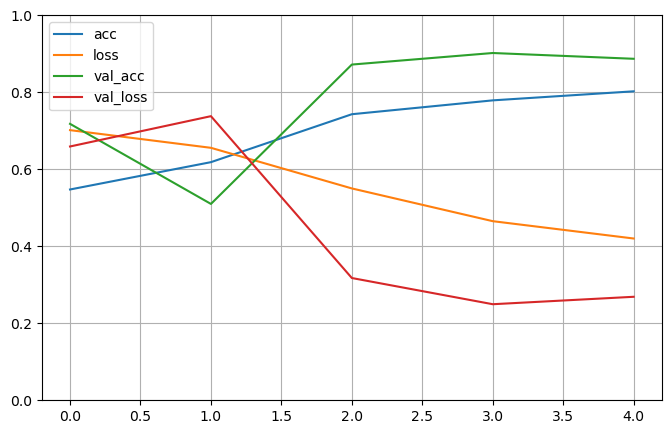

In [25]:
pd.DataFrame(history.history).plot(figsize =(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [26]:
hist_df = pd.DataFrame(history.history)

In [27]:
hist_csv_file = 'history.csv'
with open(hist_csv_file,mode='w') as f:
    hist_df.to_csv(f)

In [28]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [30]:
model.evaluate(test_generator,steps = 50)

c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - acc: 0.8627 - loss: 0.3039


[0.31964772939682007, 0.8619999885559082]